#  Cold Pool Analysis from BNF XSACR 

## Imports

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pyart
from netCDF4 import Dataset
import xarray as xr
import glob
import datetime
import pandas as pd
import matplotlib.dates as mdates
import os
import math
import calendar


## Plot a Column Vertical Profile (CVP)

In [52]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [53]:

def calculate_elevation_angle_array(height: np.ndarray, range_: np.ndarray) -> np.ndarray:
    """Returns an array of elevation angles in degrees."""
    return np.degrees(np.arctan2(height, range_))

In [56]:
def plot_qvp_5variables(qvp_dbzs,qvp_vels,qvp_wths,qvp_zdrs,qvp_rhos,dtimes, hgt,el, case,htop,qvp_dir):


    
    
    # # Ensure dtimes is np.array of datetime
    # if isinstance(dtimes, list):
    #     dtimes = np.array(dtimes)
    
    # # Fix dimensions for pcolormesh
    # if dtimes.ndim == 1:
    #     dtimes = np.tile(dtimes, (new_dbzs.shape[0], 1))
    
    # # Check datetime format
    # assert np.issubdtype(dtimes.dtype, np.datetime64) or isinstance(dtimes[0, 0], datetime.datetime)
    
    # # Ensure start_time and end_time are datetime
    # if isinstance(start_time, str):
    #     start_time = datetime.datetime.fromisoformat(start_time)
    # if isinstance(end_time, str):
    #     end_time = datetime.datetime.fromisoformat(end_time)
    
    # Transpose and convert to arrays
    new_dbzs = np.array(qvp_dbzs).T
    new_zdrs = np.array(qvp_zdrs).T
    new_rhos = np.array(qvp_rhos).T
    new_vels = np.array(qvp_vels).T
    new_wths = np.array(qvp_wths).T
    
    # Apply RhoHV mask
    mask = new_rhos < 0.2
    new_dbzs[mask] = np.nan
    new_zdrs[mask] = np.nan
    new_rhos[mask] = np.nan
    new_vels[mask] = np.nan
    new_wths[mask] = np.nan
    
    # Setup plot
    ytop = htop
    fig, axes = plt.subplots(5, 1, sharex=True, figsize=(8, 15))
    fig.subplots_adjust(hspace=0.3)
    
    # Plot Reflectivity
    #pcm = axes[0].pcolormesh(dtimes, hgt / 1e3, new_dbzs, vmin=-40, vmax=40, cmap='HomeyerRainbow')
    pcm = axes[0].pcolormesh(dtimes, hgt / 1e3, new_dbzs, vmin=-40, vmax=40, cmap='ChaseSpectral')
    fig.colorbar(pcm, ax=axes[0], label='[dBZ]')
    axes[0].set_ylim(0, ytop)
    axes[0].set_title('Reflectivity')
    axes[0].set_ylabel('height [km]')
    
    # Plot Velocity
    pcm = axes[1].pcolormesh(dtimes, hgt / 1e3, new_vels, vmin=-5, vmax=5, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[1], label='[m/s]')
    axes[1].set_ylim(0, ytop)
    axes[1].set_title('Vd')
    axes[1].set_ylabel('height [km]')
    
    # Plot Width
    pcm = axes[2].pcolormesh(dtimes, hgt / 1e3, new_wths, vmin=0, vmax=3, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[2], label='[m/s]')
    axes[2].set_ylim(0, ytop)
    axes[2].set_title('Width')
    axes[2].set_ylabel('height [km]')
    
    # Plot ZDR
    #pcm = axes[3].pcolormesh(dtimes, hgt / 1e3, new_zdrs, vmin=-2, vmax=4, cmap='Spectral_r')
    pcm = axes[3].pcolormesh(dtimes, hgt / 1e3, new_zdrs, vmin=-2, vmax=4, cmap='ChaseSpectral')
    fig.colorbar(pcm, ax=axes[3], label='[dB]')
    axes[3].set_ylim(0, ytop)
    axes[3].set_title('ZDR')
    axes[3].set_ylabel('height [km]')
    
    # Plot RhoHV
    pcm = axes[4].pcolormesh(dtimes, hgt / 1e3, new_rhos, vmin=0, vmax=1, cmap='Spectral_r')
    fig.colorbar(pcm, ax=axes[4])
    axes[4].set_ylim(0, ytop)
    axes[4].set_title('RhoHV')
    axes[4].set_ylabel('height [km]')
    axes[4].set_xlabel('Time [UTC] on ' + str(case))
    # axes[4].set_xlim([start_time, end_time])
    axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    
    # axes[4].set_xlim([dtimes.min(), dtimes.max()])
    # axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # Add main title
    plt.suptitle(f'BNF XSACR QVPs at {el} deg for {case}', y=0.95, fontsize=15)
    
    # Optional save
     
    #save_gif = qvp_dir + f'bnf_xsacr_qvp_{el}deg_{case}.png'
    #save_gif = qvp_dir + f'bnf_xsacr_qvp_{el}deg_{case}htop_{htop}.png'
    #plt.savefig(save_gif , dpi=400, bbox_inches="tight")
    plt.show()


[1.4996567 2.4884412 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 13.399661 12.997025 16.996109]
16.990616
[1.4941634 2.4994278 3.499199  4.493477 ]
4.493477
[ 6.9929047  9.997711  12.997025  16.996109 ]
16.996109
[1.4996567 2.4994278 3.4937057 4.49897  ]
4.493477
[ 6.9929047  9.992218  12.997025  16.996109 ]
16.991806
[1.4886702 2.4995184 3.4937057 4.49897  ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4996567 2.4939346 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4886702 2.4994278 3.4948554 4.493477 ]
4.493477
[ 6.9929047  9.992218  12.997025  16.990616 ]
16.996109
[1.4886702 2.4994278 3.499199  4.493477 ]
4.493477
[ 6.9929047  9.997711  12.997025  16.994118 ]
16.996109
[1.4941634 2.4994278 3.4937057 4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.990122]
16.996109
[1.4941634 2.4950006 3.504692  4.493477 ]
4.493477
[ 6.998398  9.997711 12.997025 16.996109]
16.996109
[1.4996567 2.4994278 3.504692  4.493477 ]
4.493

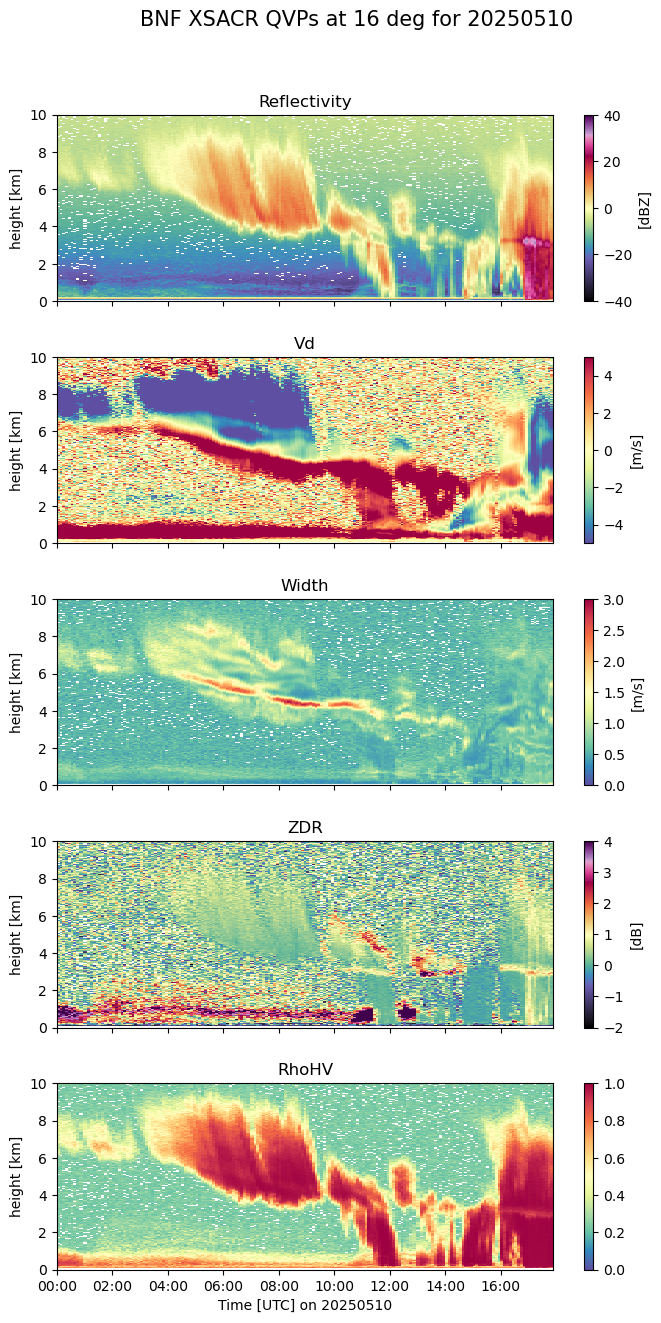

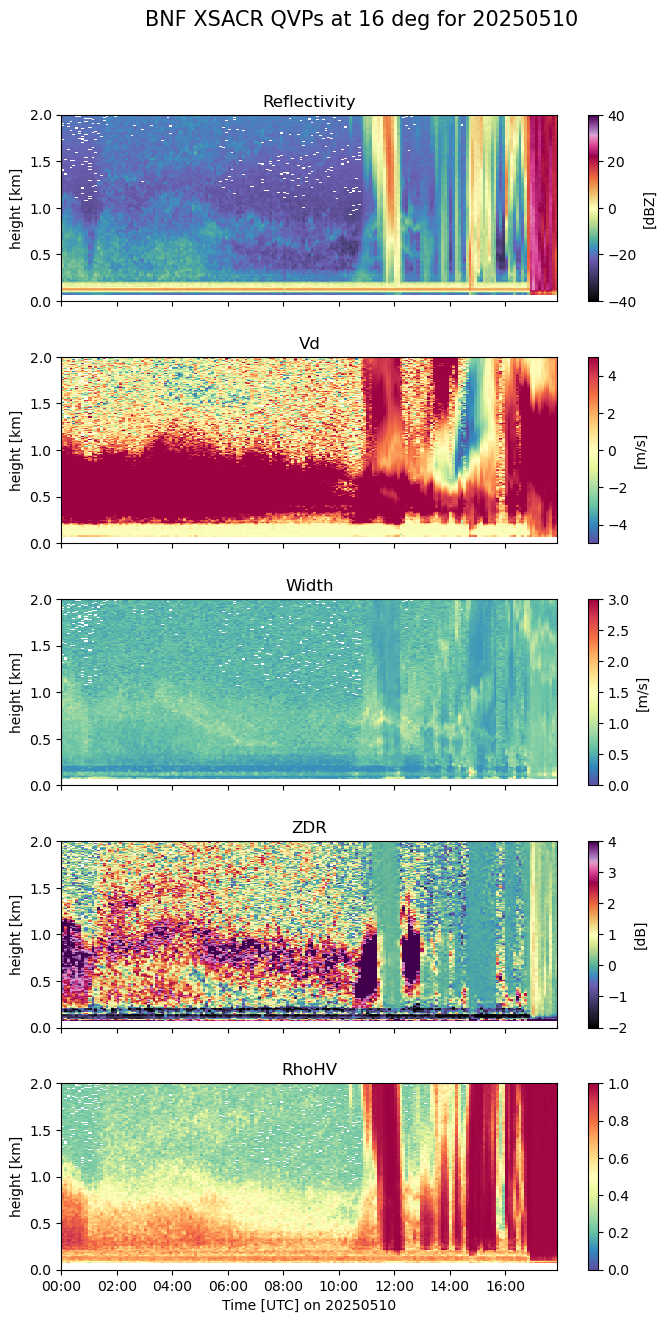

In [58]:
 
qvp_dir =  '/data/home/mdeng/data/bnf/qvp/xsacr/' 
#os.makedirs(qvp_dir, exist_ok=True)

#dir = '/data/datastream/bnf/bnfxsacrcfrS4.a1/'
#afile =  dir + 'bnfxsacrcfrS4.a1.20250514.225456.nc'

dir = "data/project/ARM_Summer_School_2025/radar/xsacr/*" 
#afile =  dir + 'bnfxsacrcfrS4.a1.202505.225456.nc'


#el = 9
el = 16

#azimuth range for a CVP
az1 = 200
az2 = 240

yr = "2025"
month = '05'
day = '10'
date_join = f"{yr}-{month}-{day}"
case = yr + month + day

files = sorted(glob.glob('/data/project/ARM_Summer_School_2025/radar/xsacr/bnfxsacrcfrS4.a1.'+case+'*'))
#files = sorted(glob.glob('/data/datastream/bnf/bnfkasacrcfrS4.a1/bnfkasacrcfrS4.a1.'+case+'*'))

nfiles = len(files)

qvp_dbzs = []
qvp_zdrs = []
qvp_rhos = []
qvp_vels = []
qvp_wths = []
dtimes = []



for file in files:
    rad = pyart.io.read(file)
    #print(file)

    
    if rad.scan_type == 'ppi':
       

        #find azimuths for XSACR file
        azmth = rad.azimuth['data']
        
        #Make this into the same shape as our radar field data
        azmth_square = np.repeat(np.expand_dims(azmth, 1), len(rad.range['data']), axis=1)
        rad.add_field_like('reflectivity', 'azsq', azmth_square)
 
        #Make a gate filter
        mygf = gatefilter = pyart.correct.GateFilter(rad)
        
        #filter on aziumth, az1 to az2 degrees
        mygf.exclude_outside('azsq', az1,az2) 


        
        #qvp = pyart.retrieve.quasi_vertical_profile(rad, desired_angle=el)
        qvp = pyart.retrieve.quasi_vertical_profile(rad, desired_angle=el, gatefilter= mygf)
        rng = qvp['range']
        hgt = qvp['height']

        angle = calculate_elevation_angle_array(hgt, rng)
        angle_mean = np.mean(angle)
        d_angle  = np.abs(angle_mean - el)
        if  d_angle  < 1:
          
            qdbz = qvp['reflectivity']
            #qdbz = qvp['attenuation_corrected_reflectivity_h'] # for csapr
            qvel = qvp['mean_doppler_velocity']
            qwth = qvp['spectral_width']
            
            qzdr = qvp['differential_reflectivity']
            qrho = qvp['copol_correlation_coeff']

            rng0 = qvp['range']
            hgt0 = qvp['height']

        
            qvp_dbzs.append(qdbz)
            qvp_zdrs.append(qzdr)
            qvp_rhos.append(qrho)
            qvp_vels.append(qvel)
            qvp_wths.append(qwth)
    
            #date = os.path.basename(files[i])[18:-3]
            date = os.path.basename(file)[18:-3]
            dto = datetime.datetime.strptime(date, '%Y%m%d.%H%M%S')
            dtimes.append(dto)
            
            #print ('done with ' + file)


rng_corr = rng*np.tan(np.deg2rad(el))
# Define the time limits 
start_time = np.datetime64(date_join+"T00:00:00")
end_time = np.datetime64(date_join+"T18:59:59")
htop = 10
plot_qvp_5variables(qvp_dbzs,qvp_vels,qvp_wths,qvp_zdrs,qvp_rhos,dtimes, hgt0,el, case,htop, qvp_dir)
htop = 2
plot_qvp_5variables(qvp_dbzs,qvp_vels,qvp_wths,qvp_zdrs,qvp_rhos,dtimes, hgt0,el, case,htop, qvp_dir)


